# Кодирование ответов открытого типа в соответсвии с классификацией ISCO-08
## 1. Описание проекта
Каждые три года Казахстан принимает участие в международном исследовании PISA, проводимом ОЭСР. Кроме того, 1000 организаций образования ежегодно принимают участие в  PISA-Based Test for Schools (далее - PBTS), одной из версий исследования PISA. Исследования оценивают способность 15-летних подростков применять свои знания и навыки в чтении, математике и естественных науках для решения жизненных задач, а также понять насколько образовательные системы эффективно поддерживают их обучение. PISA/PBTS состоит из двух частей: 
1) двухчасовой когнитивный тест;
2) анкета учащегося. 

В анкете содержатся вопросы о семейном и школьном контексте, в том числе три открытых вопроса: профессия матери, профессия отца и карьерные ожидания учащегося. Эти открытые ответы учащихся кодируются в соответствии с международной классификацией профессий ISCO-08 и используются для оценки социально-экономического статуса и карьерной готовности учащихся.

За каждый цикл исследования мы получаем от <span style='color: #DEA193;'>**55 000 до 60 000**</span> таких открытых ответов, которые учащиеся заполняют на русском и казахском языках. Кодирование этих ответов вручную требует больших временных и человеческих ресурсов: необходимо формирование двух команд по 6–8 человек на каждый язык, проведение обучения, контроль качества и согласование конфликтных кодировок. Из-за ограниченного времени и нехватки специалистов выполнение ручного кодирования представляет собой значительную нагрузку и даже неэффективной.

## 2. Цель данного проекта
В данном проекте я хочу <span style='color: #DEA193;'>**автоматизировать процесс кодирования с использованием нейросетей** </span>, чтобы облегчить работу кодировщиков и сократить необходимое количество привлечённого персонала. <span style='color: #DEA193;'>**Это решение не исключает участие кодировщиков, но позволяет сократить их число и повысить эффективность работы** </span>. Автоматическая модель кодирования применяется один раз ко всему датасету, после чего кодировщики проверяют и при необходимости корректируют присвоенные коды. Для обучения модели использовались ответы из предыдущих волн PISA, включая различные "шумовые" случаи, н-р, орфографические ошибки, латиница, несерьёзные ответы (н-р, "хочу стать супергероем 🦸🏻‍♀️").

## 3. Постановка задачи
* Тип задачи: многоклассовая классификация
* Целевая переменная: <span style='color: #DEA193;'>**код ISCO-08** </span>. 
    - ISCO-08 — это четырёхуровневая иерархически структурированная классификация, позволяющая отнести все профессии в мире к 436 единичным (базовым) группам. Каждая группа в классификации обозначена названием и кодом, а также сопровождается описанием, которое определяет её содержание.
	    1. Основная группа (Major Group) — обозначается однозначным кодом, например: 2 Professionals.
	    2. Подгруппа (Sub-Major Group) — обозначается двузначным кодом, например: 22 Health Professionals.
	    3. Малая группа (Minor Group) — обозначается трёхзначным кодом, например: 221 Medical doctors.
	    4. Единичная (базовая) группа (Unit Group) — обозначается четырёхзначным кодом, например: 2211 Generalist Medical Practitioners.
    - Существуют также <span style='color: #DEA193;'>**вспомогательные коды** </span>, которые используются для ответов, не подходящих ни под одну из профессий ISCO, но которые всё равно необходимо закодировать:
        * 9701  Doing housework, bringing up children
        * 9702  Learning, studying
        * 9703  Retired, pensioner, on unemployment benefits
        * 9704  I do not know, it's hard to say
        * 9705  Answer too general (e.g. good job, well paid job)
        * 9997  Not applicable
        * 9998  Invalid
        * 9999  No response(if response is blank)
* Метрика качества:
    - macro F1 - важна точность по всем классам, включая редкие
    - accuracy - общая точность предсказаний
* Бизнес-эффект:
    - Сокращение количества необходимых кодировщиков (с 12–16 до 4)
    - Снижение временных и финансовых затрат

## 4. О данных
### 4.1. Описание данных
* Источник: ответы на 3 открытых вопроса анкеты PISA (профессия матери, отца и карьерные ожидания обучающихся) предыдущих циклов
* Языки: казахский, русский
* Период обучения модели: [7170/7170 1:33:01, Epoch 5/6]
* Признаки: объединённый текст ответа (Title + Description)
* Целевая переменная: ISCO Code

### 4.2. Сбор и предобработка
* Объединение данных двух языков
* Очистка текстов, удаление строк с пропущенными значениями
* Кодирование меток с помощью LabelEncoder
* Отбор редких классов (удаление классов с <5 наблюдений)
* Разделение на обучающую, валидационную и тестовую выборки (70/15/15 ratio)
* Токенизация XLM-RoBERTa (large-sized model) (макс. длина = 128)
* Балансировка классов с использованием class_weights

## 5. Результаты и план внедрения
* Методы ML: <span style='color: #DEA193;'>**XLM-RoBERTa (large-sized model)** </span> 
    Выбранный метод оптимален по точности и поддерживает оба языка (русский и казахский)
* Моделирование: Обучение с использованием Trainer и ранней остановки (EarlyStopping)
* Лучшая модель достигла:
    * <span style='color: #DEA193;'>**Accuracy = 0.72** </span>
    * <span style='color: #DEA193;'>**Macro F1 = 0.39** </span>
    * Модель сохранена и готова к повторному использованию
* Продуктовый сценарий:
    * режим: пакетное кодирование (batch prediction)
    * использование: модель применяется один раз к новым данным, затем кодировщики проверяют и исправляют
    * интеграция: модель загружается из Google Drive, применяется к новым Excel-файлам от ОЭСР
* Бизнес-правила: ручная проверка обязательна (legal obligation)
* Идеи для развития:
    * Нужно учесть иерархическую структуру классов (ISCO-08)
    * Расширение до анализа других открытых ответов (например, когнитивные задания)



In [1]:
!pip install datasets
!pip install optuna
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    DataCollatorWithPadding,
    Trainer,
    TrainingArguments,
    EarlyStoppingCallback,
    XLMRobertaModel
)
import random
from google.colab import drive
import matplotlib.pyplot as plt
import torch

import os

In [ ]:
# mount drive and load excel
drive.mount('/content/drive')
filename = "PISA_ISCO_data.xlsx"
search_path = "/content/drive/MyDrive/Colab Notebooks"
file_path = next((os.path.join(root, filename)
                  for root, _, files in os.walk(search_path)
                  if filename in files), None)
assert file_path, f"{filename} not found."


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
filename = "PISA_ISCO_data.xlsx"
search_path = "/content/drive/MyDrive/Colab Notebooks"

file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break

if file_path is None:
    print(f"File '{filename}' not found in the specified directory structure.")

In [44]:
db_kk = pd.read_excel(file_path, sheet_name=0).drop(columns=['Context', 'Language', 'Source Variable', 'Output Variable', 'Dataset Output', 'Coder ID'])
db_ru = pd.read_excel(file_path, sheet_name=1).drop(columns=['Context', 'Language', 'Source Variable', 'Output Variable', 'Dataset Output', 'Coder ID'])
isco08 = pd.read_excel(file_path, sheet_name=4)

In [45]:
print(db_kk.head(5))

                                               Title  \
0                                                  -   
1  озим компьютермен жумыстанган унагандыктан, ай...   
2                                      колик айдаушы   
3                                                  -   
4                                           кәсіпкер   

                                         Description  ISCO Code  
0                                                  -       9997  
1  озим компьютермен жумыстанган унагандыктан, ай...         25  
2                                        адам тасиды       8322  
3                                                  -       9997  
4                                 мейрамхана бастығы         14  


In [46]:
print(db_ru.head(5))

                        Title  \
0  Юрист в компании "Ферреро"   
1           Дизайнером одежды   
2          мастер по маникюру   
3          риелтор(посредник)   
4                  стоматолог   

                                         Description  ISCO Code  
0                     Проверяет поделочные сладости        2611  
1                                  Дизайнером одежды       2163  
2                                       делает ногти       5142  
3  находит квартиры клиентам, договаривается с хо...       3334  
4                                         стоматолог       2261  


In [47]:
print(isco08.head(5))

   Code                                   Value
0     0                Armed forces occupations
1     1      Commissioned armed forces officers
2    11      Commissioned armed forces officers
3   110      Commissioned armed forces officers
4     2  Non-commissioned armed forces officers


In [48]:
print(isco08.tail(10))

     Code                                              Value
617  9624                      Water and firewood collectors
618  9629        Elementary workers not elsewhere classified
619  9701              Doing housework, bringing up children
620  9702                                 Learning, studying
621  9703       Retired, pensioner, on unemployment benefits
622  9704                    I do not know, it's hard to say
623  9705  Answer too general (e.g. good job, well paid j...
624  9997                                     Not applicable
625  9998                                            Invalid
626  9999                                        No response


In [49]:
db = pd.concat([db_kk, db_ru], ignore_index=True)
db['Title'] = db['Title'].fillna('')
db['Description'] = db['Description'].fillna('')
db['text'] = db['Title'] + ' ' + db['Description']

In [ ]:
## encode labels (ISCO-08 codes)
label_encoder = LabelEncoder()
db['label'] = label_encoder.fit_transform(db['ISCO Code'])
label2code = dict(enumerate(label_encoder.classes_))
code2label = {v: k for k, v in label2code.items()}

label
12     3334
15     2252
526    1905
528    1856
193    1686
       ... 
280       1
105       1
431       1
471       1
501       1
Name: count, Length: 531, dtype: int64
label
12     0.060586
15     0.040924
526    0.034618
528    0.033728
193    0.030638
         ...   
280    0.000018
105    0.000018
431    0.000018
471    0.000018
501    0.000018
Name: count, Length: 531, dtype: float64


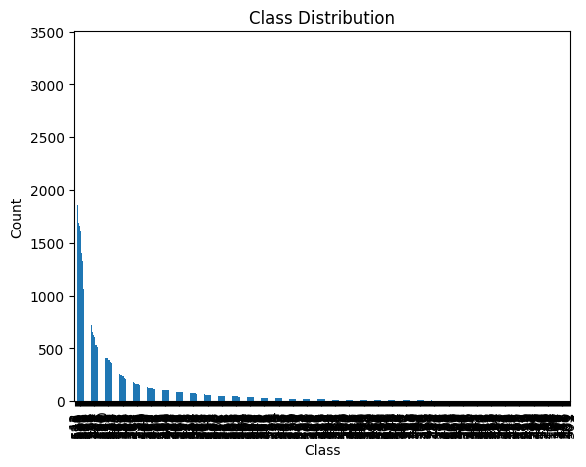

In [ ]:
label_counts = db['label'].value_counts()

print(label_counts)  # print counts per class
print(label_counts / label_counts.sum())  # print proportions

## plot distr
label_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
## as you can see, the data is highly imbalanced, so we will use class weights to balance it

In [ ]:
## drop rare classes (here 5 sample only)
valid_labels = label_counts[label_counts > 5].index
db = db[db['label'].isin(valid_labels)]

In [ ]:
## train-validation split

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    db['text'].tolist(),
    db['label'].tolist(),
    test_size=0.3,
    stratify=db['label'],
    random_state=42
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts,
    temp_labels,
    test_size=0.5,
    stratify=temp_labels,
    random_state=42
)

In [ ]:
## tokenization
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-large")
MAX_LEN = 128

def tokenize(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=MAX_LEN)
    return Dataset.from_dict({**encodings, "label": labels})

train_dataset = tokenize(train_texts, train_labels)
val_dataset = tokenize(val_texts, val_labels)
test_dataset = tokenize(test_texts, test_labels)

In [ ]:
## class weights 

NUM_CLASSES = len(label_encoder.classes_)

weights = [0.0] * NUM_CLASSES
total_samples = label_counts.sum()

## all weights to zero
weights = [0.0] * NUM_CLASSES

## compute inverse class frequency
for label, count in label_counts.items():
    weights[label] = total_samples / (count * NUM_CLASSES)

## converting to PyTorch tensor
class_weights = torch.tensor(weights, dtype=torch.float)


In [ ]:
import torch.nn as nn

## model using the full weight vector
class CustomRobertaClassifier(nn.Module):
    def __init__(self, num_labels, class_weights):
        super().__init__()
        self.roberta = XLMRobertaModel.from_pretrained("xlm-roberta-large")
        self.classifier = nn.Linear(self.roberta.config.hidden_size, num_labels)
        self.loss_fn = nn.CrossEntropyLoss(weight=class_weights)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state[:, 0, :])
        loss = None
        if labels is not None:
            loss = self.loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

model = CustomRobertaClassifier(NUM_CLASSES, class_weights)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

## metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "macro_f1": f1_score(labels, preds, average="macro")
    }

## training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=6, ## 6 epochs is enough i guess
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_ratio=0.2,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="macro_f1",
    greater_is_better=True,
    save_total_limit=2,
    seed=42,
    fp16=True
)

## trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)] ## early stopping
)

## train model
trainer.train()

<ipython-input-60-2f962062dc8d>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,Macro F1
1,3.931400,3.823092,0.516656,0.099577
2,2.411800,2.127552,0.672361,0.274672
3,1.616700,1.811275,0.701037,0.349449
4,1.675700,1.672361,0.712386,0.379527
5,1.229400,1.589899,0.721293,0.404885


TrainOutput(global_step=7170, training_loss=2.480322806040446, metrics={'train_runtime': 5581.8621, 'train_samples_per_second': 41.108, 'train_steps_per_second': 1.285, 'total_flos': 0.0, 'train_loss': 2.480322806040446, 'epoch': 5.995711745633302})

In [ ]:
## encode test data
test_encodings = tokenizer(test_texts, truncation=True, padding=True)
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

test_results = trainer.evaluate(test_dataset)

print("Test Evaluation Results:")
for key, value in test_results.items():
    print(f"{key}: {value:.4f}")


Test Evaluation Results:
eval_loss: 1.6140
eval_accuracy: 0.7202
eval_macro_f1: 0.3917
eval_runtime: 62.0227
eval_samples_per_second: 132.1290
eval_steps_per_second: 33.0360
epoch: 5.9957


In [ ]:
## save model and tokenizer
save_directory = "/content/drive/MyDrive/Colab Notebooks/isco_coding_xlm_roberta_large_model"

trainer.save_model(save_directory)
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")

Model and tokenizer saved to /content/drive/MyDrive/Colab Notebooks/isco_coding_xlm_roberta_large_model


In [74]:
import joblib
joblib.dump(label_encoder, f"{save_directory}/label_encoder.pkl")

['/content/drive/MyDrive/Colab Notebooks/isco_coding_xlm_roberta_large_model/label_encoder.pkl']